# Telecom Churn Analysis

## Import Libraries !!!

In [1]:
import matplotlib.pyplot as plt       # Plot Graphs and Graphical representation.
import pandas as pd                   # Apply DataFrame (rows and columns) based operations.
%matplotlib inline                   
                                      # Graphs shows below the cell not in other window or editor.
import numpy as np                    # Use for Numerical operations perform in DataFrame
import math                           # Use For ceil() function.
import seaborn as sns

In [2]:
df = pd.read_csv("telecom-churn.csv")    # Read the dataset file in .csv formate.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df.isnull().values.any()       # Check the Missing Values in records

False

In [8]:
df.TotalCharges.isnull().unique()   # In TotalCharges attribute has check null value. 

array([False])

In [9]:
df.TotalCharges.describe()    # Check Data types or unique values of TotalCharges attribute.

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

## Change the Attribute(TotalCharges) String to Float.

In [10]:
df["TotalCharges"]=df.TotalCharges.convert_objects(convert_numeric=True)   

C:\Users\Sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Data Cleansing: Redesign the data into a usable/functional format and correct/remove any bad data !!!

#### We will Change 'No phone service' to 'No' for column "MultipleLines"

In [13]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [14]:
df.MultipleLines.replace(['No phone service'],["No"],inplace = True )
df["MultipleLines"].unique()

array(['No', 'Yes'], dtype=object)

#### We will Change 'No internet service' to 'No' for column "OnlineSecurity" .

In [15]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
df["OnlineSecurity"].replace(['No internet service'],['No'],inplace= True)
df["OnlineSecurity"].unique()

array(['No', 'Yes'], dtype=object)

#### We will Change 'No internet service' to 'No' for column "OnlineBackup" .

In [17]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [18]:
df["OnlineBackup"].replace(['No internet service'],['No'],inplace= True)
df["OnlineBackup"].unique()

array(['Yes', 'No'], dtype=object)

#### We will Change 'No internet service' to 'No' for column "DeviceProtection"

In [19]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
df["DeviceProtection"].replace(['No internet service'],['No'],inplace= True)
df["DeviceProtection"].unique()

array(['No', 'Yes'], dtype=object)

#### We will Change 'No internet service' to 'No' for column "TechSupport"

In [21]:
df["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
df["TechSupport"].replace(['No internet service'],['No'],inplace= True)
df["TechSupport"].unique()

array(['No', 'Yes'], dtype=object)

#### We will Change 'No internet service' to 'No' for column "StreamingTV"

In [23]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
df["StreamingTV"].replace(['No internet service'],['No'],inplace= True)
df["StreamingTV"].unique()

array(['No', 'Yes'], dtype=object)

#### We will Change 'No internet service' to 'No' for column "StreamingMovies"

In [25]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df["StreamingMovies"].replace(['No internet service'],['No'],inplace= True)
df["StreamingMovies"].unique()

array(['No', 'Yes'], dtype=object)

## Change the Tenure (Months wise) to tenure (Year wise).

In [27]:
df["tenure"].nunique()

73

In [28]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Minimum tenure Month is 0 and Maximum tenure Month is 72.
So we change the tenure in months to Year wise duration.

In [29]:
df['tenure_yr']=df["tenure"]/12                   # Months covert in Years.

In [30]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_yr
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.083333
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2.833333


In [31]:
df["tenure_year"]= np.ceil(df.tenure_yr)        # Months covert in Years range.

In [32]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_yr,tenure_year
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.083333,1.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2.833333,3.0


## Remove Columns we do not need for the analysis .

In [33]:
df=df.drop(["customerID"], axis=1)     # customerID has does not use in analysis
                                           # axis= 1(columns) or 0(index/rows)

### How many Churn of total customer.

In [34]:
gen=df.groupby(["Churn"]).count()

In [35]:
gen

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_yr,tenure_year
Churn,,,,,,,,,,,,,,,,,,,,,
No,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,...,5174,5174,5174,5174,5174,5174,5174,5163,5174,5174
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,...,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


No     5174
Yes    1869
Name: Churn, dtype: int64

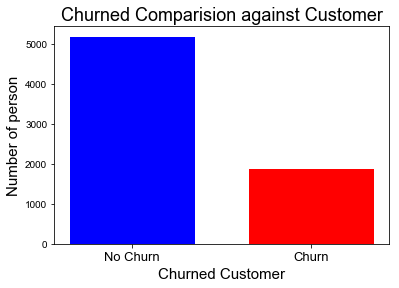

In [36]:
plt.bar(["No","Yes"],gen["gender"].tolist() , align="center", width=0.7 ,color=['blue', 'red'],alpha=1 )
plt.title("Churned Comparision against Customer",size=18)
plt.ylabel("Number of person",size=15)
plt.xlabel("Churned Customer",size=15)
plt.xticks(["No","Yes"],["No Churn", "Churn"],size=13)
sns.set(style="whitegrid")
df["Churn"].value_counts()

The number of Churn Customer is less.

## Bar Plots at percentage wise of attributes using matplotlib !!!

### Gender wise total percentage comparision.

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

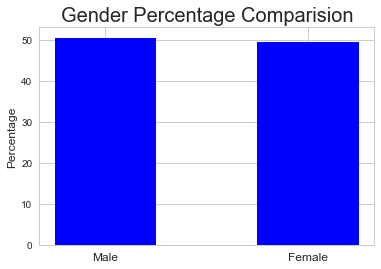

In [37]:
gender_per= df.gender.value_counts() / len(df.gender) *100
plt.bar(["No","Yes"],gender_per,align='center', width=0.5 ,color="blue" )
plt.title("Gender Percentage Comparision",size=20)
plt.xticks([0,1],["Male","Female"],size=12)
plt.ylabel("Percentage",size=12)
sns.set(style="whitegrid")
gender_per

In the sample dataset Male count and Female count approx equal.

### Churn Customer total percentage comparision.

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

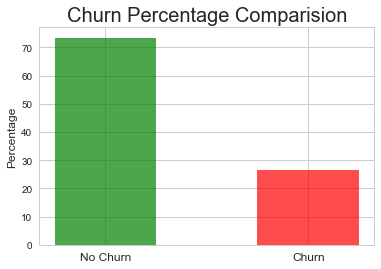

In [38]:
churn_per= df.Churn.value_counts() / len(df.Churn) *100
plt.bar(["No","Yes"],churn_per , align="center", width=0.5 ,color=['green', 'red'],alpha=0.7 )
plt.title("Churn Percentage Comparision",size=20)
plt.xticks([0,1],["No Churn","Churn"],size=12)
plt.ylabel("Percentage",size=12)
churn_per

The Churn Customer is 26.53% of the total record. We Focused on that person.

### Senior Citizen Customer total percentage comparision.

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

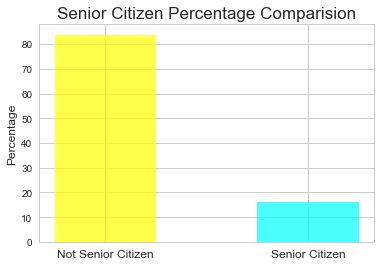

In [39]:
senior_per= df.SeniorCitizen.value_counts() / len(df.SeniorCitizen) *100
plt.bar(["No","Yes"],senior_per,align='center', width=0.5 ,color=['yellow', 'cyan'], alpha=0.7 )
plt.title("Senior Citizen Percentage Comparision",size=17)
plt.xticks([0,1],["Not Senior Citizen","Senior Citizen"],size=12)
plt.ylabel("Percentage",size=12)
senior_per

Senior Citizen are only 16.21% in total record.
Its very less number of person they have use the telecom services.

### Partner Customer total percentage comparision.

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

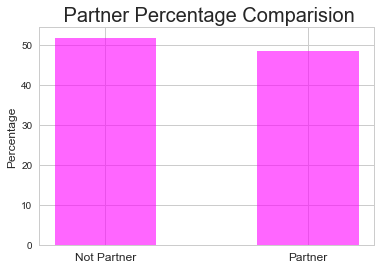

In [40]:
partner_per= df.Partner.value_counts() / len(df.Partner) *100
plt.bar(["No","Yes"],partner_per,align='center', width=0.5 ,color="magenta", alpha=0.6 )
plt.title(" Partner Percentage Comparision" ,size=20)
plt.xticks([0,1],["Not Partner","Partner"],size=12)
plt.ylabel("Percentage",size=12)
partner_per

Partner Customer or Not a Partner Customer has approximate equal in the dataset.`

### Dependents Customer total percentage comparision.

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

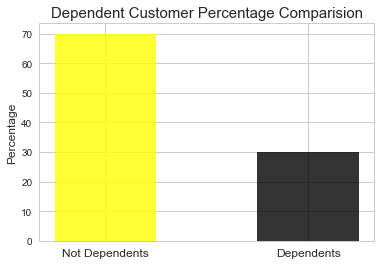

In [41]:
Dependents_per= df.Dependents.value_counts() / len(df.Dependents) *100
plt.bar(["No","Yes"],Dependents_per,align='center', width=0.5 ,color=['yellow', 'black'], alpha=0.8 )
plt.title("Dependent Customer Percentage Comparision" ,size=15)
plt.xticks([0,1],["Not Dependents","Dependents"],size=12)
plt.ylabel("Percentage",size=12)
Dependents_per

Dependent Customer has only ~30% . Customer have Not Dependent on other counts has large in number(~70%).

### How many percentage of customer use Phone Service or Not ?

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

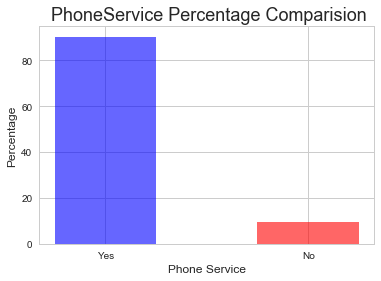

In [42]:
PhoneService_per= df.PhoneService.value_counts() / len(df.PhoneService) *100
plt.bar(["No","Yes"],PhoneService_per,align='center', width=0.5 ,color=['blue', 'red'], alpha=0.6 )
plt.title(" PhoneService Percentage Comparision" , size=18)
plt.xlabel("Phone Service" , size=12)
plt.xticks([0,1],["Yes","No"])
plt.ylabel("Percentage",size=12)
PhoneService_per

The Phone Service usage by Customer has maximum in nature (above 90%) , its very less number of customer have does not use to Phone Service.


### How many percentage of customer use Multiple Lines Service or Not ?

No     57.816271
Yes    42.183729
Name: MultipleLines, dtype: float64

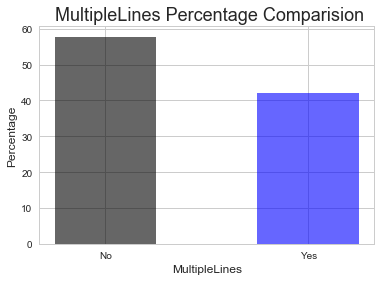

In [43]:
MultipleLines_per= df.MultipleLines.value_counts() / len(df.MultipleLines) *100
plt.bar(["No","Yes"],MultipleLines_per,align='center', width=0.5 ,color=['black', 'blue'], alpha=0.6 )
plt.title(" MultipleLines Percentage Comparision" , size=18)
plt.xlabel("MultipleLines" , size=12)
plt.xticks([0,1],["No","Yes"])
plt.ylabel("Percentage",size=12)
MultipleLines_per

MultipleLines Service has approx 60% person are Not used.

In [44]:
df["MultipleLines"].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

### Which Internet Service use by customer ,percentage comparision of services.

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

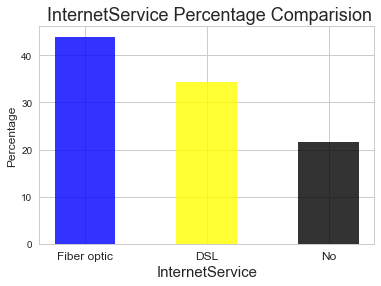

In [45]:
InternetService_per= df.InternetService.value_counts() / len(df.InternetService) *100
plt.bar(["Fiber optic","DSL","No"],InternetService_per,align='center',width=0.5 ,color=['blue', 'yellow','black'],alpha=0.8 )
plt.title(" InternetService Percentage Comparision" , size=18)
plt.xlabel("InternetService" , size=15)
plt.xticks([0,1,2],["Fiber optic","DSL","No"],size=12)
plt.ylabel("Percentage",size=12)
InternetService_per

In InternetService there are Two types of service provided first FIBER OPTICS and another is DSL(Digital Subscriber Line), in these Mostly use of FIBER OPTICS service  at 44% or DSL service at 34.37% and remaining has 21.67% customer has not used to InternetServices.

### How many percentage of customer use Online Security Service or Not ?

No     71.333239
Yes    28.666761
Name: OnlineSecurity, dtype: float64

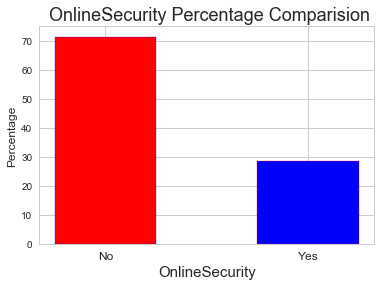

In [46]:
OnlineSecurity_per= df.OnlineSecurity.value_counts() / len(df.OnlineSecurity) *100
plt.bar(["No","Yes"],OnlineSecurity_per,align='center', width=0.5 ,color=["red","blue"], edgecolor=["blue","red"])
plt.title(" OnlineSecurity Percentage Comparision" , size=18)
plt.xlabel("OnlineSecurity" , size=15)
plt.xticks([0,1],["No","Yes"],size=12)
plt.ylabel("Percentage",size=12)
OnlineSecurity_per


OnlineSecurity Service has 71 % customer has NOT used.

### How many percentage of customer use Online Backup Service or Not ?

No     65.511856
Yes    34.488144
Name: OnlineBackup, dtype: float64

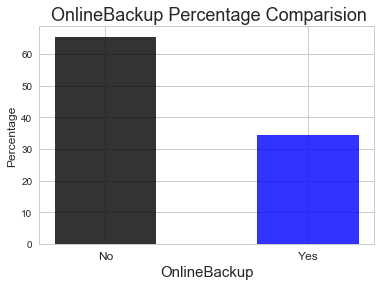

In [47]:
OnlineBackup_per= df.OnlineBackup.value_counts() / len(df.OnlineBackup) *100
plt.bar(["No","Yes"],OnlineBackup_per,align='center', width=0.5 ,color=['black', 'blue'], alpha=0.8 )
plt.title(" OnlineBackup Percentage Comparision" , size=18)
plt.xlabel("OnlineBackup" , size=15)
plt.xticks([0,1],["No","Yes"],size=12)
plt.ylabel("Percentage",size=12)
OnlineBackup_per

OnlineBackup Service has only 34.48 % Customer has to be prefferd.

### How many percentage of customer use Device Protection Service or Not ?

No     65.611245
Yes    34.388755
Name: DeviceProtection, dtype: float64

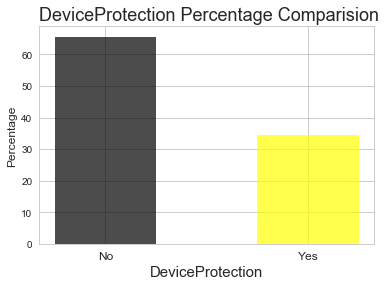

In [48]:
DeviceProtection_per= df.DeviceProtection.value_counts() / len(df.DeviceProtection) *100
plt.bar(["No","Yes"],DeviceProtection_per,align='center', width=0.5 ,color=['black', 'yellow'],alpha=0.7 )
plt.title(" DeviceProtection Percentage Comparision" , size=18)
plt.xlabel("DeviceProtection" , size=15)
plt.xticks([0,1],["No","Yes"],size=12)
plt.ylabel("Percentage",size=12)
DeviceProtection_per

Device Protection Service has only 34.48 % Customer has to be prefferd.

### How many percentage of customer use Technical Support Service or Not ?

No     70.978276
Yes    29.021724
Name: TechSupport, dtype: float64

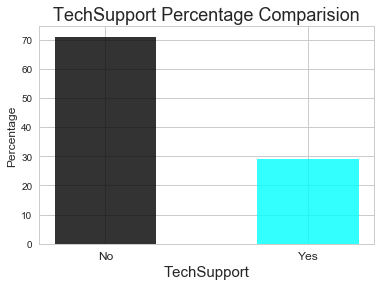

In [49]:
TechSupport_per= df.TechSupport.value_counts() / len(df.TechSupport) *100
plt.bar(["No","Yes"],TechSupport_per,align='center', width=0.5 ,color=['black', 'cyan'], alpha=0.8 )
plt.title("TechSupport Percentage Comparision" , size=18)
plt.xlabel("TechSupport" , size=15)
plt.xticks([0,1],["No","Yes"],size=12)
plt.ylabel("Percentage",size=12)
TechSupport_per

TechSupport Service has only 30 % Customer has to be prefferd.

### How many percentage of customer use StreamingTV Service or Not ?

No     61.564674
Yes    38.435326
Name: StreamingTV, dtype: float64

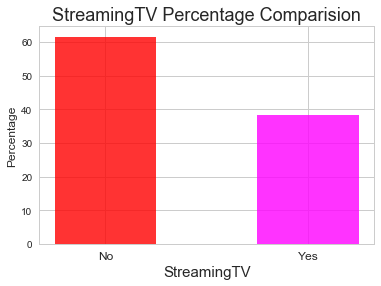

In [50]:
StreamingTV_per= df.StreamingTV.value_counts() / len(df.StreamingTV) *100
plt.bar(["No","Yes"],StreamingTV_per,align='center', width=0.5 ,color=['red', 'magenta'], alpha=0.8)
plt.title("StreamingTV Percentage Comparision" , size=18)
plt.xlabel("StreamingTV" , size=15)
plt.xticks([0,1],["No","Yes"],size=12)
plt.ylabel("Percentage",size=12)
StreamingTV_per

StreamingTV Service has 40 % Customer has to be used. Now a days its demanding service.

### How many percentage of customer use Streaming Movies Service or Not ?

No     61.209712
Yes    38.790288
Name: StreamingMovies, dtype: float64

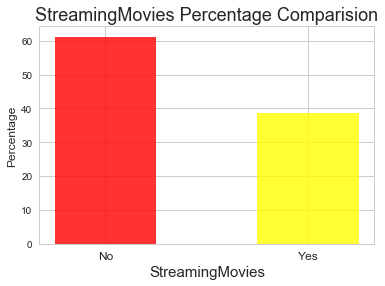

In [51]:
StreamingMovies_per= df.StreamingMovies.value_counts() / len(df.StreamingMovies) *100
plt.bar(["No","Yes"],StreamingMovies_per,align='center', width=0.5 ,color=['red', 'yellow'], alpha=0.8)
plt.title("StreamingMovies Percentage Comparision" , size=18)
plt.xlabel("StreamingMovies" , size=15)
plt.xticks([0,1],["No","Yes"],size=12)
plt.ylabel("Percentage",size=12)
StreamingMovies_per

StreamingMovies Service has 40 % Customer has to be used. Now a days its also demanding service.
Because internet users are increses day by day.

### Which Contract Service mostly take by customer ? percentage wise comparision of Contract.

In [52]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

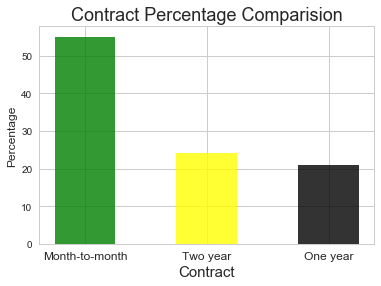

In [53]:
Contract_per= df.Contract.value_counts() / len(df.Contract) *100
plt.bar(["Month-to-month","Two year","One year"],Contract_per,align='center', width=0.5 ,color=['green', 'yellow','black'], alpha=0.8)
plt.title("Contract Percentage Comparision" , size=18)
plt.xlabel("Contract" , size=15)
plt.xticks([0,1,2],["Month-to-month","Two year","One year"],size=12)
plt.ylabel("Percentage",size=12)
Contract_per

([<matplotlib.patches.Wedge at 0x23684dd44e0>,
 [Text(-0.180584,1.13573,'Month-to-month'),
  Text(-0.531542,-0.974456,'Two year'),
  Text(0.910571,-0.702396,'One year')],
 [Text(-0.102069,0.641936,'55.02%'),
  Text(-0.292108,-0.535512,'24.07%'),
  Text(0.51467,-0.397007,'20.91%')])

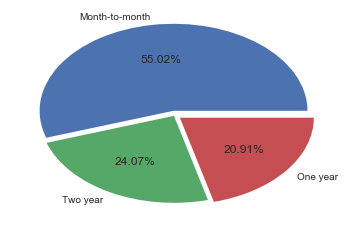

In [54]:
plt.pie(Contract_per, labels=["Month-to-month","Two year","One year"],shadow=False, autopct= '%1.2f%%',explode=(0.05,0.01,0.05))



##### In Contract Service , Month-to-Month Services more prefferd as compare to One year or Two year plan.Month-to-Month service more than 55% customer has use.

### How many percentage of customer use Paperless Billing Service or Not ?

Yes    59.221922
No     40.778078
Name: PaperlessBilling, dtype: float64

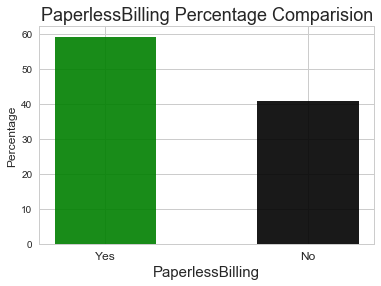

In [55]:
PaperlessBilling_per= df.PaperlessBilling.value_counts() / len(df.PaperlessBilling) *100
plt.bar(["No","Yes"],PaperlessBilling_per,align='center', width=0.5 ,color=['green','black' ], alpha=0.9)
plt.title("PaperlessBilling Percentage Comparision" , size=18)
plt.xlabel("PaperlessBilling" , size=15)
plt.xticks([0,1],["Yes","No"],size=12)
plt.ylabel("Percentage",size=12)
PaperlessBilling_per

PaperlessBilling Service has 60 % Customer has to be prefferd.

### Which Payement Methods mostly take by customer ? percentage wise comparision of Payment Methods.

In [56]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

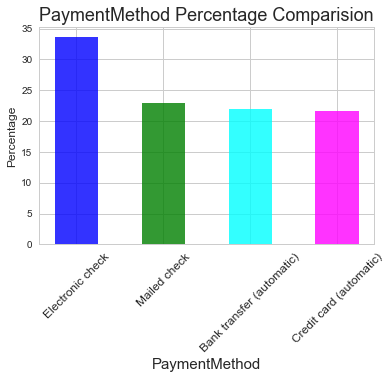

In [57]:
PaymentMethod_per= df.PaymentMethod.value_counts() / len(df.PaymentMethod) *100
plt.bar(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],PaymentMethod_per,align='center', width=0.5 ,color=['blue', 'green','cyan','magenta'], alpha=0.8)
plt.title("PaymentMethod Percentage Comparision" , size=18)
plt.xlabel("PaymentMethod" , size=15)
plt.xticks([0,1,2,3],["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],size=12, rotation=45)
plt.ylabel("Percentage",size=12)
PaymentMethod_per

In Payment Methods options Electronic Check service has more prefferd as compare to other options.

### How many percentage of customer are continue with services at  year wise show ?

1.0    30.881727
6.0    19.977282
2.0    14.539259
5.0    11.813148
3.0    11.813148
4.0    10.819253
0.0     0.156183
Name: tenure_year, dtype: float64

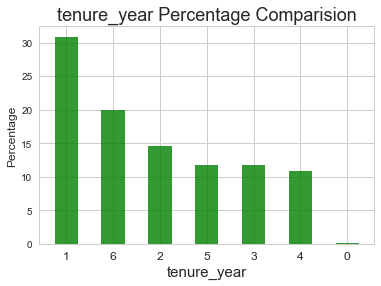

In [58]:
tenure_year_per= df.tenure_year.value_counts() / len(df.tenure_year) *100
plt.bar(["1","2","3","4","5","6","0"],tenure_year_per,align='center', width=0.5 ,color="green", alpha=0.8)
plt.title("tenure_year Percentage Comparision" , size=18)
plt.xlabel("tenure_year" , size=15)
plt.xticks([0,1,2,3,4,5,6],["1","6","2","5","3","4","0"],size=12)
plt.ylabel("Percentage",size=12)
tenure_year_per

([<matplotlib.patches.Wedge at 0x23684cb8a20>,
 [Text(0.621668,0.907485,'1year'),
  Text(-0.923929,0.596955,'6year'),
  Text(-0.959623,-0.537703,'2year'),
  Text(-0.253103,-1.07049,'5year'),
  Text(0.537061,-0.959982,'3year'),
  Text(1.03342,-0.376888,'4year'),
  Text(1.09999,-0.0053973,'0Month')],
 [Text(0.339092,0.494992,'30.88%'),
  Text(-0.503961,0.325612,'19.98%'),
  Text(-0.523431,-0.293292,'14.54%'),
  Text(-0.138056,-0.583901,'11.81%'),
  Text(0.292942,-0.523627,'11.81%'),
  Text(0.563683,-0.205575,'10.82%'),
  Text(0.599993,-0.00294398,'0.16%')])

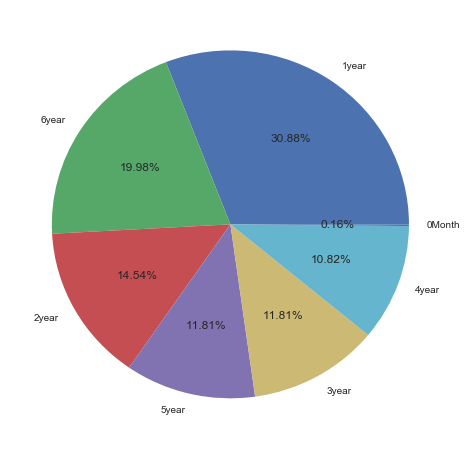

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.despine()
plt.pie(df.tenure_year.value_counts(), labels=["1year","6year","2year","5year","3year","4year","0Month"],shadow=False, autopct= '%1.2f%%')

Maximum Customer are services used at tenure at upto 12 Months (30.88%) of overall customer.

## Different Graphs shows of combination of attributes using matplotlib and Seaborn !!!

Text(0.5,0,'')

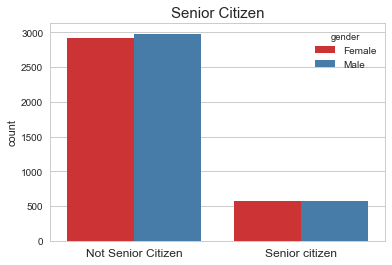

In [60]:
sns.countplot(x='SeniorCitizen', data=df,hue='gender',palette="Set1")
plt.xticks([0,1],["Not Senior Citizen","Senior citizen"],size=12)
plt.title("Senior Citizen",size = 15)
plt.xlabel("")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
tenure_yr           7043 non-null float64
tenure_year         7043 non-nu

Text(0.5,0,'')

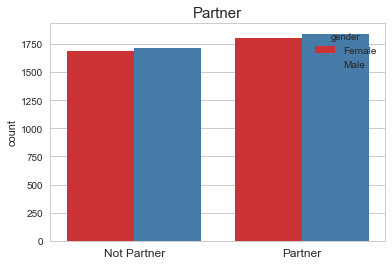

In [62]:

sns.countplot(x='Partner', data=df,hue='gender',palette="Set1")
plt.xticks([0,1],["Not Partner","Partner"],size=12)
plt.title("Partner",size = 15)
plt.xlabel("")
#plt.legend(fontsize=15)

Gender wise Comparision has not effective in all services , its both male and female has equal ratio in all attributes.

In [63]:
df1= df.groupby(["Churn",'InternetService']).count() 
df1

gender  SeniorCitizen  Partner  Dependents  tenure  \
Churn InternetService                                                       
No    DSL                1962           1962     1962        1962    1962   
      Fiber optic        1799           1799     1799        1799    1799   
      No                 1413           1413     1413        1413    1413   
Yes   DSL                 459            459      459         459     459   
      Fiber optic        1297           1297     1297        1297    1297   
      No                  113            113      113         113     113   

                       PhoneService  MultipleLines  OnlineSecurity  \
Churn InternetService                                                
No    DSL                      1962           1962            1962   
      Fiber optic              1799           1799            1799   
      No                       1413           1413            1413   
Yes   DSL                       459            459             459   
      Fiber optic              1297           1297            1297   
      No                        113            113             113   

                       OnlineBackup  DeviceProtection  TechSupport  \
Churn InternetService                                                
No    DSL                      1962              1962         1962   
      Fiber optic              1799              1799         1799   
      No                       1413              1413         1413   
Yes   DSL                       459               459          459   
      Fiber optic              1297              1297         1297   
      No                        113               113          113   

                       StreamingTV  StreamingMovies  Contract  \
Churn InternetService                                           
No    DSL                     1962             1962      1962   
      Fiber optic             1799             1799      1799   
      No                      1413             1413      1413   
Yes   DSL                      459              459       459   
      Fiber optic             1297             1297      1297   
      No                       113              113       113   

                       PaperlessBilling  PaymentMethod  MonthlyCharges  \
Churn InternetService                                                    
No    DSL                          1962           1962            1962   
      Fiber optic                  1799           1799            1799   
      No                           1413           1413            1413   
Yes   DSL                           459            459             459   
      Fiber optic                  1297           1297            1297   
      No                            113            113             113   

                       TotalCharges  tenure_yr  tenure_year  
Churn InternetService                                        
No    DSL                      1957       1962         1962  
      Fiber optic              1799       1799         1799  
      No                       1407       1413         1413  
Yes   DSL                       459        459          459  
      Fiber optic              1297       1297         1297  
      No                        113        113          113

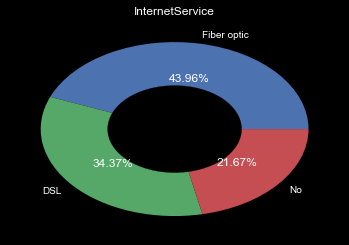

In [64]:
df.InternetService.value_counts()/len(df.InternetService) *100
size_of_groups=df['InternetService'].value_counts()
# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('black')

# Change color of text
plt.rcParams['text.color'] = 'white'


 # Create a pieplot
plt.pie(size_of_groups,labels=["Fiber optic","DSL","No"], autopct= '%1.2f%%')
plt.title('InternetService')

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.5, color='black')
p=plt.gcf()
p.gca().add_artist(my_circle) 
plt.show()



Internet Service has Two types at provides by the provider, in this FIBER OPTICS Service has more preffered as compare to DSL(Digital Subscriber Line)

Text(0,0.5,'InternetService')

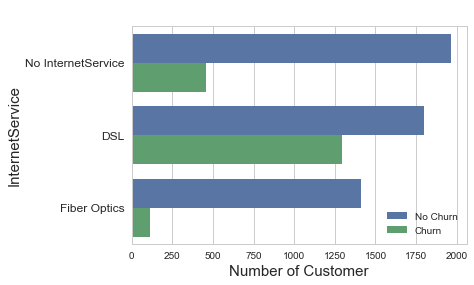

In [65]:
sns.countplot(y='InternetService', data=df,hue='Churn')
plt.yticks([0,1,2], ['No InternetService','DSL',"Fiber Optics"],size=12)
plt.title("Churn Customer",size=18)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("Number of Customer",size=15)
plt.ylabel("InternetService",size=15)

In Internet Services has Maximum Churn Customer at used DSL service, that service has required as more improvemrnt or other option FIBER OPTICS has more advertised or make a user friendly. 

Text(0,0.5,'Number of Customer')

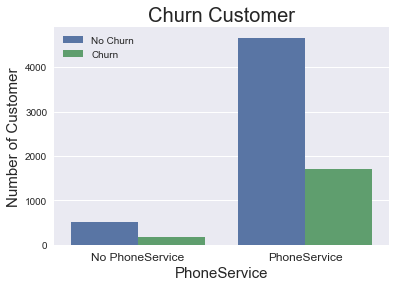

In [66]:
sns.countplot(x='PhoneService', data=df,hue='Churn')
plt.xticks([0,1], ['No PhoneService','PhoneService'],size=12)
plt.title("Churn Customer",size=20)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("PhoneService",size=15)
plt.ylabel("Number of Customer",size=15)

Phone Service as service is most used as compare to Not use , Churn customer has not more effected by Phone Service.

In [67]:
df2= df.groupby(["Churn",'tenure_year']).count() 
df2

gender  SeniorCitizen  Partner  Dependents  tenure  \
Churn tenure_year                                                       
No    0.0              11             11       11          11      11   
      1.0            1138           1138     1138        1138    1138   
      2.0             730            730      730         730     730   
      3.0             652            652      652         652     652   
      4.0             617            617      617         617     617   
      5.0             712            712      712         712     712   
      6.0            1314           1314     1314        1314    1314   
Yes   1.0            1037           1037     1037        1037    1037   
      2.0             294            294      294         294     294   
      3.0             180            180      180         180     180   
      4.0             145            145      145         145     145   
      5.0             120            120      120         120     120   
      6.0              93             93       93          93      93   

                   PhoneService  MultipleLines  InternetService  \
Churn tenure_year                                                 
No    0.0                    11             11               11   
      1.0                  1138           1138             1138   
      2.0                   730            730              730   
      3.0                   652            652              652   
      4.0                   617            617              617   
      5.0                   712            712              712   
      6.0                  1314           1314             1314   
Yes   1.0                  1037           1037             1037   
      2.0                   294            294              294   
      3.0                   180            180              180   
      4.0                   145            145              145   
      5.0                   120            120              120   
      6.0                    93             93               93   

                   OnlineSecurity  OnlineBackup  DeviceProtection  \
Churn tenure_year                                                   
No    0.0                      11            11                11   
      1.0                    1138          1138              1138   
      2.0                     730           730               730   
      3.0                     652           652               652   
      4.0                     617           617               617   
      5.0                     712           712               712   
      6.0                    1314          1314              1314   
Yes   1.0                    1037          1037              1037   
      2.0                     294           294               294   
      3.0                     180           180               180   
      4.0                     145           145               145   
      5.0                     120           120               120   
      6.0                      93            93                93   

                   TechSupport  StreamingTV  StreamingMovies  Contract  \
Churn tenure_year                                                        
No    0.0                   11           11               11        11   
      1.0                 1138         1138             1138      1138   
      2.0                  730          730              730       730   
      3.0                  652          652              652       652   
      4.0                  617          617              617       617   
      5.0                  712          712              712       712   
      6.0                 1314         1314             1314      1314   
Yes   1.0                 1037         1037             1037      1037   
      2.0                  294          294              294       294   
      3.0                  180          180              180       

Text(0,0.5,'Duration')

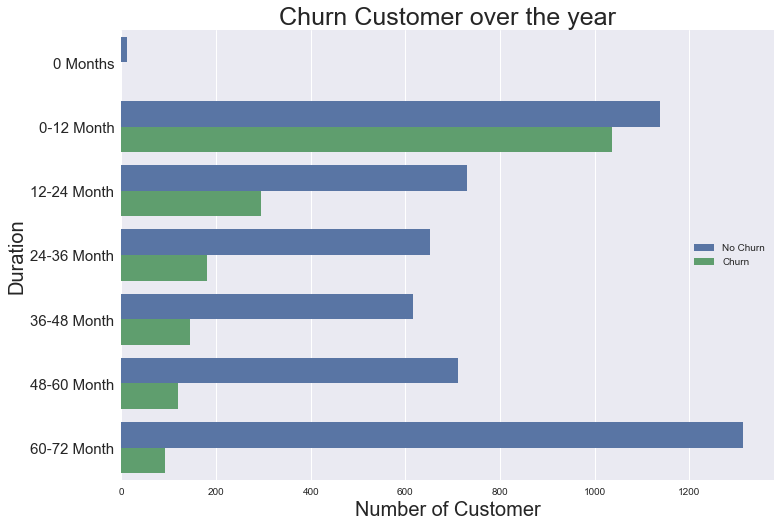

In [68]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.despine()
sns.countplot(y='tenure_year', data=df,hue='Churn')
plt.yticks([0,1,2,3,4,5,6], ['0 Months','0-12 Month','12-24 Month','24-36 Month',\
                             '36-48 Month','48-60 Month','60-72 Month'],size=15)
plt.title("Churn Customer over the year",size=25)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("Number of Customer",size=20)
plt.ylabel("Duration",size=20)

In Churn Customer has Maximum in One year Tenure Range , these range customer has provide more offers and Stay tunned with the services and take time to used the services.

In [69]:
df3= df.groupby(["PaymentMethod","Churn"]).count() 
df3

gender  SeniorCitizen  Partner  Dependents  \
PaymentMethod             Churn                                               
Bank transfer (automatic) No       1286           1286     1286        1286   
                          Yes       258            258      258         258   
Credit card (automatic)   No       1290           1290     1290        1290   
                          Yes       232            232      232         232   
Electronic check          No       1294           1294     1294        1294   
                          Yes      1071           1071     1071        1071   
Mailed check              No       1304           1304     1304        1304   
                          Yes       308            308      308         308   

                                 tenure  PhoneService  MultipleLines  \
PaymentMethod             Churn                                        
Bank transfer (automatic) No       1286          1286           1286   
                          Yes       258           258            258   
Credit card (automatic)   No       1290          1290           1290   
                          Yes       232           232            232   
Electronic check          No       1294          1294           1294   
                          Yes      1071          1071           1071   
Mailed check              No       1304          1304           1304   
                          Yes       308           308            308   

                                 InternetService  OnlineSecurity  \
PaymentMethod             Churn                                    
Bank transfer (automatic) No                1286            1286   
                          Yes                258             258   
Credit card (automatic)   No                1290            1290   
                          Yes                232             232   
Electronic check          No                1294            1294   
                          Yes               1071            1071   
Mailed check              No                1304            1304   
                          Yes                308             308   

                                 OnlineBackup  DeviceProtection  TechSupport  \
PaymentMethod             Churn                                                
Bank transfer (automatic) No             1286              1286         1286   
                          Yes             258               258          258   
Credit card (automatic)   No             1290              1290         1290   
                          Yes             232               232          232   
Electronic check          No             1294              1294         1294   
                          Yes            1071              1071         1071   
Mailed check              No             1304              1304         1304   
                          Yes             308               308          308   

                                 StreamingTV  StreamingMovies  Contract  \
PaymentMethod             Churn                                           
Bank transfer (automatic) No            1286             1286      1286   
                          Yes            258              258       258   
Credit card (automatic)   No            1290             1290      1290   
                          Yes            232              232       232   
Electronic check          No            1294             1294      1294   
                          Yes           1071             1071      1071   
Mailed check              No            1304             1304      1304   
                          Yes            308              308       308   

                                 PaperlessBilling  MonthlyCharges  \
PaymentMethod             Churn                                     
Bank transfer (automatic) No                 1286            1286   
                          Yes                 258             258   
Credit card 

Text(0,0.5,'PaymentMethod')

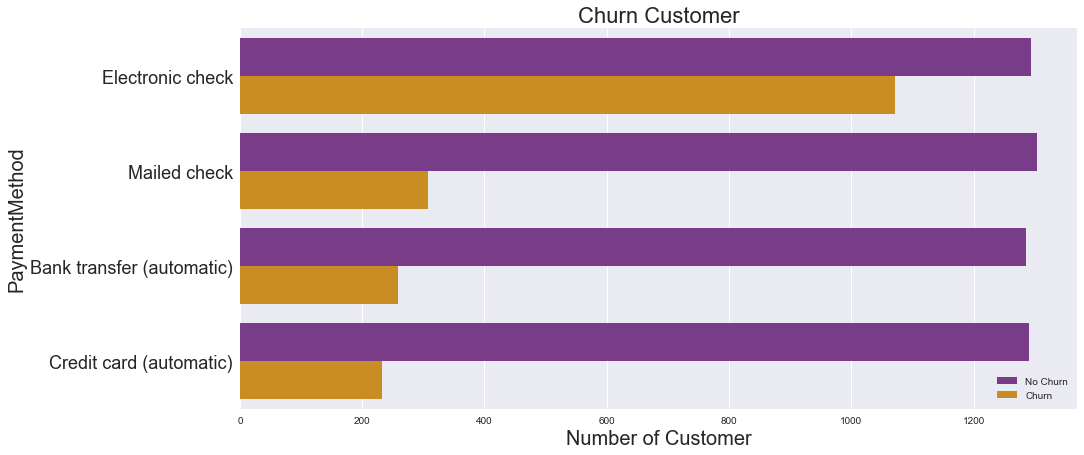

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.despine()
sns.countplot(y='PaymentMethod', data=df,hue='Churn',palette="CMRmap")
plt.yticks([0,1,2,3], ["Electronic check","Mailed check","Bank transfer (automatic)",\
                       "Credit card (automatic)"],size=18)
plt.title("Churn Customer",size=22)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("Number of Customer",size=20)
plt.ylabel("PaymentMethod",size=20)

The Payment Methods Options has Electronic check payment method has maximum Churn Customers , this payment method option have not  offered in future.
Other options as Bank transfer (automatic) and Credit card (automatic) is more easy payment modes can preffered.

In [71]:
df4= df.groupby(["Contract","Churn"]).count() 
df4

gender  SeniorCitizen  Partner  Dependents  tenure  \
Contract       Churn                                                       
Month-to-month No       2220           2220     2220        2220    2220   
               Yes      1655           1655     1655        1655    1655   
One year       No       1307           1307     1307        1307    1307   
               Yes       166            166      166         166     166   
Two year       No       1647           1647     1647        1647    1647   
               Yes        48             48       48          48      48   

                      PhoneService  MultipleLines  InternetService  \
Contract       Churn                                                 
Month-to-month No             2220           2220             2220   
               Yes            1655           1655             1655   
One year       No             1307           1307             1307   
               Yes             166            166              166   
Two year       No             1647           1647             1647   
               Yes              48             48               48   

                      OnlineSecurity  OnlineBackup  DeviceProtection  \
Contract       Churn                                                   
Month-to-month No               2220          2220              2220   
               Yes              1655          1655              1655   
One year       No               1307          1307              1307   
               Yes               166           166               166   
Two year       No               1647          1647              1647   
               Yes                48            48                48   

                      TechSupport  StreamingTV  StreamingMovies  \
Contract       Churn                                              
Month-to-month No            2220         2220             2220   
               Yes           1655         1655             1655   
One year       No            1307         1307             1307   
               Yes            166          166              166   
Two year       No            1647         1647             1647   
               Yes             48           48               48   

                      PaperlessBilling  PaymentMethod  MonthlyCharges  \
Contract       Churn                                                    
Month-to-month No                 2220           2220            2220   
               Yes                1655           1655            1655   
One year       No                 1307           1307            1307   
               Yes                 166            166             166   
Two year       No                 1647           1647            1647   
               Yes                  48             48              48   

                      TotalCharges  tenure_yr  tenure_year  
Contract       Churn                                        
Month-to-month No             2220       2220         2220  
               Yes            1655       1655         1655  
One year       No             1306       1307         1307  
               Yes             166        166          166  
Two year       No             1637       1647         1647  
               Yes              48         48           48

In [72]:
df[df.Contract=="Two year"]["Churn"].value_counts()

No     1647
Yes      48
Name: Churn, dtype: int64

Text(0,0.5,'Contract')

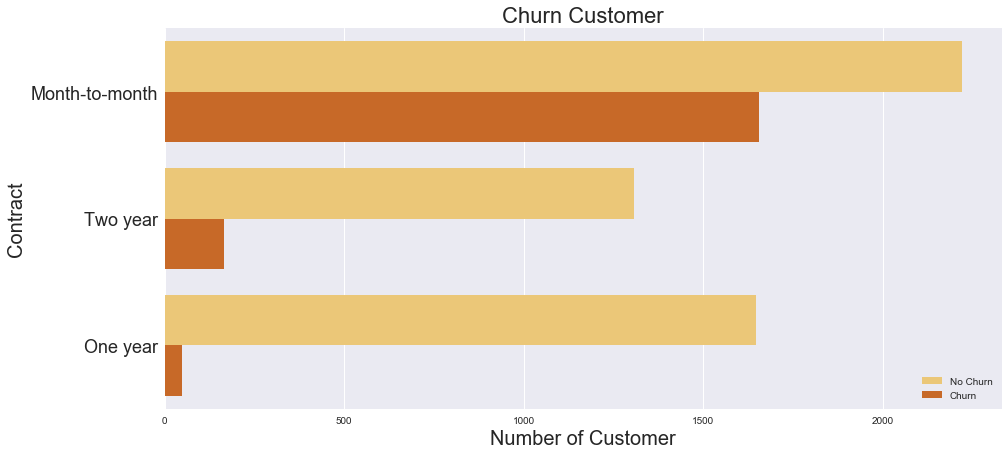

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.despine()
sns.countplot(y='Contract', data=df,hue='Churn',palette="YlOrBr")
plt.yticks([0,2,1], ["Month-to-month","One year","Two year"],size=18)
plt.title("Churn Customer",size=22)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("Number of Customer",size=20)
plt.ylabel("Contract",size=20)

In Contract Service , Month-to-Month Services more prefferd as compare to One year or Two year plan , But Maximum Churn Customer has also in Month-to-Month Service, So the new customer has added or those customer who has tenure range is 0-12 Months these customer has provide One Year or Two year plan has to suggested added more attractive offers ,than customer choose One or Two Year plan , than Churn Rate is decreases.

In [74]:
df5= df.groupby(["InternetService","Churn"]).count() 
df5

gender  SeniorCitizen  Partner  Dependents  tenure  \
InternetService Churn                                                       
DSL             No       1962           1962     1962        1962    1962   
                Yes       459            459      459         459     459   
Fiber optic     No       1799           1799     1799        1799    1799   
                Yes      1297           1297     1297        1297    1297   
No              No       1413           1413     1413        1413    1413   
                Yes       113            113      113         113     113   

                       PhoneService  MultipleLines  OnlineSecurity  \
InternetService Churn                                                
DSL             No             1962           1962            1962   
                Yes             459            459             459   
Fiber optic     No             1799           1799            1799   
                Yes            1297           1297            1297   
No              No             1413           1413            1413   
                Yes             113            113             113   

                       OnlineBackup  DeviceProtection  TechSupport  \
InternetService Churn                                                
DSL             No             1962              1962         1962   
                Yes             459               459          459   
Fiber optic     No             1799              1799         1799   
                Yes            1297              1297         1297   
No              No             1413              1413         1413   
                Yes             113               113          113   

                       StreamingTV  StreamingMovies  Contract  \
InternetService Churn                                           
DSL             No            1962             1962      1962   
                Yes            459              459       459   
Fiber optic     No            1799             1799      1799   
                Yes           1297             1297      1297   
No              No            1413             1413      1413   
                Yes            113              113       113   

                       PaperlessBilling  PaymentMethod  MonthlyCharges  \
InternetService Churn                                                    
DSL             No                 1962           1962            1962   
                Yes                 459            459             459   
Fiber optic     No                 1799           1799            1799   
                Yes                1297           1297            1297   
No              No                 1413           1413            1413   
                Yes                 113            113             113   

                       TotalCharges  tenure_yr  tenure_year  
InternetService Churn                                        
DSL             No             1957       1962         1962  
                Yes             459        459          459  
Fiber optic     No             1799       1799         1799  
                Yes            1297       1297         1297  
No              No             1407       1413         1413  
                Yes             113        113          113

Text(0,0.5,'Internet Services')

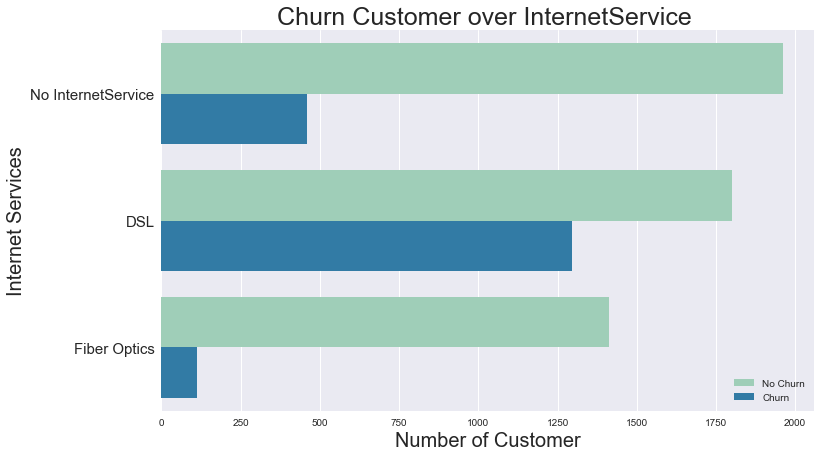

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 7)
#sns.despine()
sns.countplot(y='InternetService', data=df,hue='Churn',palette="YlGnBu")
plt.yticks([0,1,2],['No InternetService','DSL',"Fiber Optics"],size=15)
plt.title("Churn Customer over InternetService ",size=25)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("Number of Customer",size=20)
plt.ylabel("Internet Services",size=20)

In Internet Services has Maximum Churn Customer at used DSL service, that service has required as more improvemrnt or other option FIBER OPTICS has more advertised or make a user friendly. 

#### Problem: Internet service has row are eleminate ??

In [76]:
df6= df.groupby(["Churn"]).count() 
df6

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_yr,tenure_year
Churn,,,,,,,,,,,,,,,,,,,,,
No,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,...,5174,5174,5174,5174,5174,5174,5174,5163,5174,5174
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,...,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


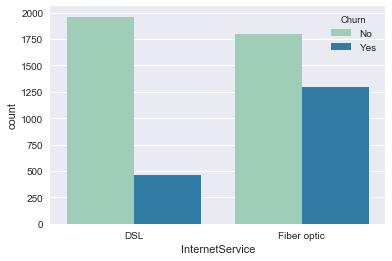

In [77]:
sns.countplot(hue="Churn", data=df[df.InternetService != 'No' ],x='InternetService',palette="YlGnBu")

In [78]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_yr', 'tenure_year'],
      dtype='object')

In [79]:
df7= df.groupby(['OnlineSecurity',"Churn"]).count() 
df7

gender  SeniorCitizen  Partner  Dependents  tenure  \
OnlineSecurity Churn                                                       
No             No       3450           3450     3450        3450    3450   
               Yes      1574           1574     1574        1574    1574   
Yes            No       1724           1724     1724        1724    1724   
               Yes       295            295      295         295     295   

                      PhoneService  MultipleLines  InternetService  \
OnlineSecurity Churn                                                 
No             No             3450           3450             3450   
               Yes            1574           1574             1574   
Yes            No             1724           1724             1724   
               Yes             295            295              295   

                      OnlineBackup  DeviceProtection  TechSupport  \
OnlineSecurity Churn                                                
No             No             3450              3450         3450   
               Yes            1574              1574         1574   
Yes            No             1724              1724         1724   
               Yes             295               295          295   

                      StreamingTV  StreamingMovies  Contract  \
OnlineSecurity Churn                                           
No             No            3450             3450      3450   
               Yes           1574             1574      1574   
Yes            No            1724             1724      1724   
               Yes            295              295       295   

                      PaperlessBilling  PaymentMethod  MonthlyCharges  \
OnlineSecurity Churn                                                    
No             No                 3450           3450            3450   
               Yes                1574           1574            1574   
Yes            No                 1724           1724            1724   
               Yes                 295            295             295   

                      TotalCharges  tenure_yr  tenure_year  
OnlineSecurity Churn                                        
No             No             3443       3450         3450  
               Yes            1574       1574         1574  
Yes            No             1720       1724         1724  
               Yes             295        295          295

Text(0,0.5,'Number of Customer')

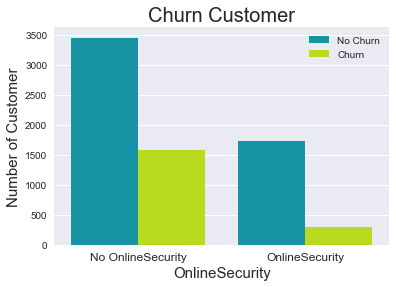

In [80]:
sns.countplot(x='OnlineSecurity', data=df,hue='Churn',palette="nipy_spectral")
plt.xticks([0,1], ['No OnlineSecurity','OnlineSecurity'],size=12)
plt.title("Churn Customer",size=20)
sns.set(style="whitegrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel('OnlineSecurity',size=15)
plt.ylabel("Number of Customer",size=15)

Online Security services has those who service are used has minimum number of Churned customer , Online Security Service has more improve or added facility to other customers than make more profit or decrease Churn Rate.

Text(0,0.5,'Number of Customer')

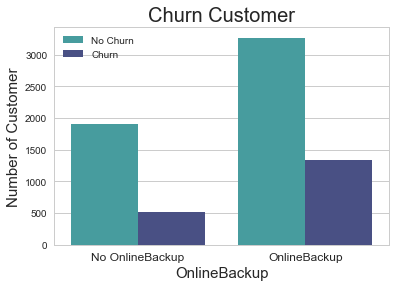

In [81]:
sns.countplot(x='OnlineBackup', data=df,hue='Churn',palette="mako_r")
plt.xticks([0,1], ['No OnlineBackup','OnlineBackup'],size=12)
plt.title("Churn Customer",size=20)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel('OnlineBackup',size=15)
plt.ylabel("Number of Customer",size=15)

Online Backup services has more number are customer is used and its Churn rate as more as compare to other services. Then this service has required to more improvement.

Text(0,0.5,'Number of Customer')

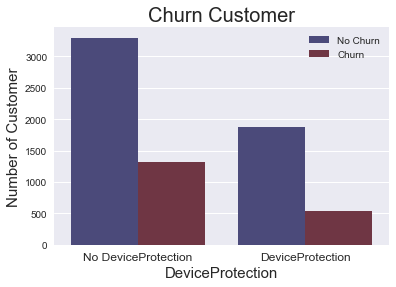

In [82]:
sns.countplot(x='DeviceProtection', data=df,hue='Churn',palette="icefire")
plt.xticks([0,1], ['No DeviceProtection','DeviceProtection'],size=12)
plt.title("Churn Customer",size=20)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel('DeviceProtection',size=15)
plt.ylabel("Number of Customer",size=15)

Device Protection services has those who service are used has minimum number of Churned customer , Device Protection Service has more improve or added facility to other customers than make more profit or decrease Churn Rate.

Text(0,0.5,'Number of Customer')

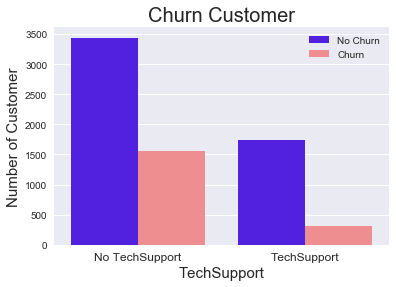

In [83]:
sns.countplot(x='TechSupport', data=df,hue='Churn',palette="gnuplot2")
plt.xticks([0,1], ['No TechSupport','TechSupport'],size=12)
plt.title("Churn Customer",size=20)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel('TechSupport',size=15)
plt.ylabel("Number of Customer",size=15)

TechSupport services has those who service are used has minimum number of Churned customer , TechSupport Service has more improve or added facility to other customers than make more profit or decrease Churn Rate.

Text(0,0.5,'Number of Customer')

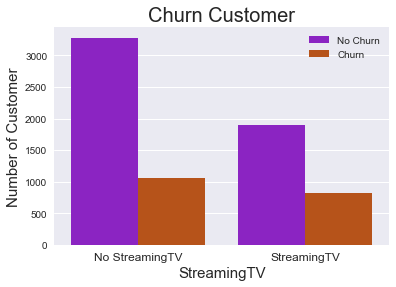

In [84]:
sns.countplot(x='StreamingTV', data=df,hue='Churn',palette="gnuplot")
plt.xticks([0,1], ['No StreamingTV','StreamingTV'],size=12)
plt.title("Churn Customer",size=20)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel('StreamingTV',size=15)
plt.ylabel("Number of Customer",size=15)

Sreaming TV services Churned Customer has more percentile as compare to Not used that service , then this service has required to more improvement. 

Text(0,0.5,'Number of Customer')

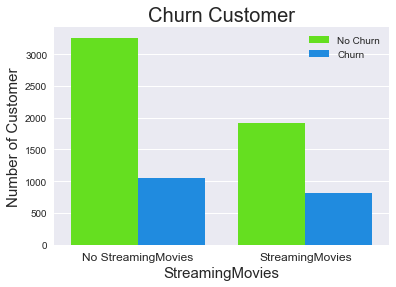

In [85]:
sns.countplot(x='StreamingMovies', data=df,hue='Churn',palette="gist_rainbow")
plt.xticks([0,1], ['No StreamingMovies','StreamingMovies'],size=12)
plt.title("Churn Customer",size=20)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel('StreamingMovies',size=15)
plt.ylabel("Number of Customer",size=15)

Sreaming Movies services Churned Customer has more percentile as compare to Not used that service , then this service has required to more improvement. These is similar to Streaming TV service.

Text(0,0.5,'Number of Customer')

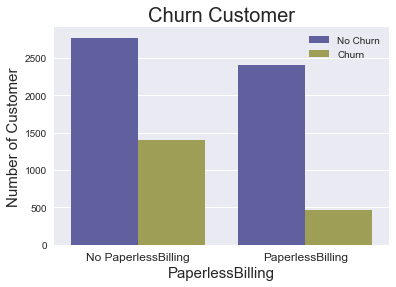

In [86]:
sns.countplot(x='PaperlessBilling', data=df,hue='Churn',palette="gist_stern")
plt.xticks([0,1], ['No PaperlessBilling','PaperlessBilling'],size=12)
plt.title("Churn Customer",size=20)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel('PaperlessBilling',size=15)
plt.ylabel("Number of Customer",size=15)

Paperless Billing service has very important service ,this service has very less Churn Rate as compare to those who do not use the serices .Then this service has make more user friendly or easy.

## Preprocesseing: 1) Feature Selection

In [87]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_yr,tenure_year
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.083333,1.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2.833333,3.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.166667,1.0
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.750000,4.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.166667,1.0


In [88]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_yr', 'tenure_year'],
      dtype='object')

In [89]:
data1=df[['Churn','InternetService','tenure','Partner','Dependents','PhoneService',\
          'MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection', \
          'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling',\
          'PaymentMethod','MonthlyCharges','tenure_year']]

In [90]:
data1.head()

,Churn,InternetService,tenure,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,tenure_year
0,No,DSL,1,Yes,No,No,No,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,1.0
1,No,DSL,34,No,No,Yes,No,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,3.0
2,Yes,DSL,2,No,No,Yes,No,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1.0
3,No,DSL,45,No,No,No,No,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,4.0
4,Yes,Fiber optic,2,No,No,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1.0


In [91]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
Churn               7043 non-null object
InternetService     7043 non-null object
tenure              7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
tenure_year         7043 non-null float64
dtypes: float64(2), int64(1), object(15)
memory usage: 990.5+ KB


## Preprocessing: 2) Data Transformation

In [92]:
data1.Churn.replace(['No','Yes'],[0,1],inplace=True)
data1.InternetService.replace(['No','Fiber optic','DSL'],[0,1,2],inplace=True)
data1.Partner.replace(['No','Yes'],[0,1],inplace=True)
data1.Dependents.replace(['No','Yes'],[0,1],inplace=True)
data1.PhoneService.replace(['No','Yes'],[0,1],inplace=True)
data1.MultipleLines.replace(['No','Yes'],[0,1],inplace=True)
data1.OnlineSecurity.replace(['No','Yes'],[0,1],inplace=True)
data1.OnlineBackup.replace(['No','Yes'],[0,1],inplace=True)
data1.DeviceProtection.replace(['No','Yes'],[0,1],inplace=True)
data1.TechSupport.replace(['No','Yes'],[0,1],inplace=True)
data1.StreamingTV.replace(['No','Yes'],[0,1],inplace=True)
data1.StreamingMovies.replace(['No','Yes'],[0,1],inplace=True)
data1.Contract.replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
data1.PaperlessBilling.replace(['No','Yes'],[0,1],inplace=True)
data1.PaymentMethod.replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[1,2,3,4],inplace=True)


C:\Users\Sachin\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [93]:
data1.head()

,Churn,InternetService,tenure,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,tenure_year
0,0,2,1,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,1.0
1,0,2,34,0,0,1,0,1,0,1,0,0,0,1,0,2,56.95,3.0
2,1,2,2,0,0,1,0,1,1,0,0,0,0,0,1,2,53.85,1.0
3,0,2,45,0,0,0,0,1,0,1,1,0,0,1,0,3,42.30,4.0
4,1,1,2,0,0,1,0,0,0,0,0,0,0,0,1,1,70.70,1.0


## Apply Modeling Technique 

### Define Dependent Attributes (Y)  or Independent Attributes(X) in Feature Selecting Dataset.

In [94]:
X=data1[['tenure','InternetService','PhoneService','MultipleLines','Contract', 'PaperlessBilling','MonthlyCharges']]
Y=data1['Churn']

### SPLITTING DATA INTO TRAIN & TEST

In [95]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)# 75% training and 25% test.

C:\Users\Sachin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [96]:
X_train.shape

(5282, 7)

In [97]:
X_test.shape

(1761, 7)

# Apply Logistic Regression Model 

In [98]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Pridiction Test

In [99]:
y_pred=logreg.predict(X_test)        # Prediction Function 

## Check Accuracy 

In [100]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8103350369108461


Apply Logistic Regression Model Technique has accuracy is 80.97 %.

# Conclusion

Features such as tenure, Contract, PaperlessBilling, MonthlyCharges and InternetService appear to play a role in customer churn.

There does not seem to be a relationship between gender and churn.

Customers in a month-to-month contract, with PaperlessBilling and are within 12 months tenure, are more likely to churn; On the other hand, customers with one or two year contract, with longer than 12 months tenure, that are not using PaperlessBilling, are less likely to churn.

### Apply different algorithms of machine learning

In [101]:
#machin learning algorithms using scikit-learn (sklearn) library.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

C:\Users\Sachin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [108]:
score = []

In [109]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score.append(metrics.accuracy_score(y_test, y_pred))
print("The Accuracy of Random Forest Classifier")
print(metrics.accuracy_score(y_test, y_pred))

The Accuracy of Random Forest Classifier
0.7739920499716071


In [110]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score.append(metrics.accuracy_score(y_test, y_pred))
print("The Accuracy of Decision Tree Classifier")
print(metrics.accuracy_score(y_test, y_pred))

The Accuracy of Decision Tree Classifier
0.7296990346394094


In [111]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score.append(metrics.accuracy_score(y_test, y_pred))
print("The Accuracy of K Nearest Neighbour Classifier")
print(metrics.accuracy_score(y_test, y_pred))

The Accuracy of K Nearest Neighbour Classifier
0.7853492333901193


In [112]:
clf  =  svm.LinearSVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score.append(metrics.accuracy_score(y_test, y_pred))
print("The Accuracy of Support Vector Machine Classifier")
print(metrics.accuracy_score(y_test, y_pred))

The Accuracy of Support Vector Machine Classifier
0.730266893810335


In [113]:
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score.append(metrics.accuracy_score(y_test, y_pred))
print("The Accuracy of Gradient Boosting Classifier")
print(metrics.accuracy_score(y_test, y_pred))

The Accuracy of Gradient Boosting Classifier
0.8114707552526973


In [114]:
score

[0.7739920499716071,
 0.7296990346394094,
 0.7853492333901193,
 0.730266893810335,
 0.8114707552526973]

In [115]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','K-Nearest Neighbor','SVM','Gradient Boosting')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[0.7739920499716071, 0.7296990346394094, 0.7853492333901193, 0.730266893810335, 0.8114707552526973]


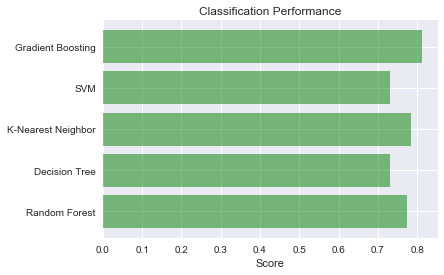

In [117]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

The best result is Gradient Boosting Classifer 81.14% Accuracy